## Analiza najpomembnejših tritedenskih dirk v kolesarstvu ##

V tej datoteki se lotimo analize treh najpomembnejših dirk v kolesarstvu. To so Giro d'Italia (dirka po Italiji), Tour de France (dirka po Franciji) in Vuelta a España (dirka po Španiji). Analizo bomo začeli s klasičnimi metrika, recimo pretekli zmagovalci, dolžine etap... V drugem delu analize pa se posvetimo analizi karakteristik posameznih dirk. Poudarek tukaj je predvsem na vzponih, saj so si ravninske etap med seboj zelo podobne.

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("style.mplstyle")

### Analiza vzponov ###
Da analizo dirk malo poglobimo in popestrimo, bomo analizirali vzpone, ki se pojavljajo na dirkah. Žal podatki o vzponih niso konsistentni do leta 2015, ko so na spletno stran PCS začeli objavljati podatke. Kljub temu pa je podatkov dovolj, da naredimo neke smiselne zaključke.

Začnimo s pregledom vzponov, ki se na dirkah najpogosteje pojavljajo. Tukaj je morda smiselno omeniti, da ni nujno, da se dirke pričnejo v državi, ki dirko organizira. Posledica tega je recimo, da se nekateri vzponi lahko pojavijo tako na dirki po Španiji kot na dirki po Franciji.

In [82]:
data_frame = pd.read_csv("../data/csv/climbs.csv")
data_frame

,Name,Length,Steepness,Vertical,Year,Race
0,Col du Lautaret,0.0,0.0,0,2003,tour-de-france
1,Col d'Izoard,0.0,0.0,0,2003,tour-de-france
2,Côte de Saint-Apollinaire,0.0,0.0,0,2003,tour-de-france
3,Côte de la Rochette,0.0,0.0,0,2003,tour-de-france
4,Col du Tourmalet,0.0,0.0,2105,2016,tour-de-france
...,...,...,...,...,...,...
1058,Monte Berico,0.8,7.6,53,2025,giro-d-italia
1059,Monte Berico,0.8,7.6,133,2025,giro-d-italia
1060,Illaz,0.7,6.4,277,2025,giro-d-italia
1061,Saver,0.7,7.7,141,2025,giro-d-italia


Sprva si poglejmo porazdelitev števila vzponov glede na leto

MultiIndex([(  'giro-d-italia', 2018),
            (  'giro-d-italia', 2020),
            (  'giro-d-italia', 2021),
            (  'giro-d-italia', 2022),
            (  'giro-d-italia', 2023),
            (  'giro-d-italia', 2024),
            (  'giro-d-italia', 2025),
            ( 'tour-de-france', 2003),
            ( 'tour-de-france', 2016),
            ( 'tour-de-france', 2017),
            ( 'tour-de-france', 2018),
            ( 'tour-de-france', 2019),
            ( 'tour-de-france', 2020),
            ( 'tour-de-france', 2021),
            ( 'tour-de-france', 2022),
            ( 'tour-de-france', 2023),
            ( 'tour-de-france', 2024),
            ( 'tour-de-france', 2025),
            ('vuelta-a-espana', 2020),
            ('vuelta-a-espana', 2021),
            ('vuelta-a-espana', 2022),
            ('vuelta-a-espana', 2023),
            ('vuelta-a-espana', 2024),
            ('vuelta-a-espana', 2025)],
           names=['Race', 'Year'])


TypeError: 'value' must be an instance of str or bytes, not a tuple

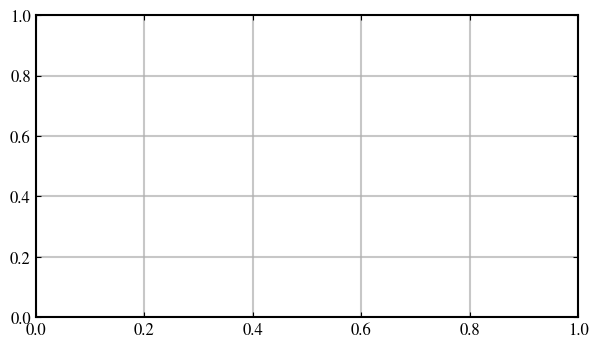

In [83]:
graph_climbs_by_year = data_frame.groupby(["Race", "Year"]).count()

print(graph_climbs_by_year.index)
plt.plot(graph_climbs_by_year.index, graph_climbs_by_year.values)
plt.xlim([2019, 2025])
plt.title("Število vzponov na leto")
plt.xlabel("Leto")
plt.ylabel("#Vzponov")
plt.show()

Opazimo, da imajo direke podobno število vzponov, vseeno pa izstopa dirka po Franciji. Število vzponov pa zagotovo ni edino merilo o zahtevnosti etap. Zato si je smiselno pogeldati tudi povprečno višino in dolžino vzponov.

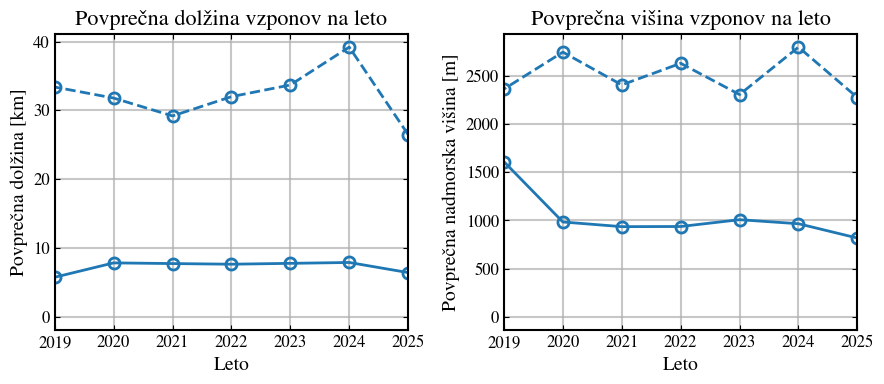

In [ ]:
graph_climb_length_by_year = data_frame.groupby("Year")["Length"].mean()
graph_climb_max_length_by_year = data_frame.groupby("Year")["Length"].max()

graph_climb_height_by_year = data_frame[data_frame["Vertical"] != 0].groupby("Year")["Vertical"].mean()
graph_climb_max_height_by_year = data_frame.groupby("Year")["Vertical"].max()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

p1 = ax[0].plot(graph_climb_length_by_year.index, graph_climb_length_by_year.values)

colour =  p1[0].get_color()

ax[0].plot(graph_climb_max_length_by_year.index, graph_climb_max_length_by_year.values, linestyle="--", color = colour)
ax[0].set_xlim([2019, 2025])
ax[0].set_title("Povprečna dolžina vzponov na leto")
ax[0].set_xlabel("Leto")
ax[0].set_ylabel("Povprečna dolžina [km]")


ax[1].plot(graph_climb_height_by_year.index, graph_climb_height_by_year.values, color = colour)
ax[1].plot(graph_climb_max_height_by_year.index, graph_climb_max_height_by_year.values, linestyle="--", color = colour)
ax[1].set_xlim([2019, 2025])
ax[1].set_title("Povprečna višina vzponov na leto")
ax[1].set_xlabel("Leto")
ax[1].set_ylabel("Povprečna nadmorska višina [m]")

fig.set_tight_layout(True)
plt.show()

Izbira vzponov je med leti ne glede na dirko zelo usklajena. Med dirkami pa prihaja do različnih odstopanj, recimo opazimo lahko...

Kot zadnje merilo pa si poglejmo še naklon vzponov. Dirka po Španiji je recimo znana kot dirka, ki ima kratke a izjemno strme vzpone. To se odraža predvsem v naklon, kjer lahko kolesarji pogosto pričakujejo tudi nad 20% naklon na delih vzponov. Sprva si poglejmo tabelo naklonov soritrano po najvišjem povprečnem naklonu

In [ ]:
data_frame.sort_values("Steepness", ascending=False).drop_duplicates(subset="Name").head(15)

,Name,Length,Steepness,Vertical,Year,Race
511,Mirador de Ézaro,1.8,14.2,268,2020,vuelta-a-espana
551,Puerto Collado de Ballesteros,2.9,13.4,1410,2021,vuelta-a-espana
592,Les Praeres,3.8,12.9,742,2022,vuelta-a-espana
1054,Muro di Ca' del Poggio,1.0,12.2,244,2025,giro-d-italia
63,Côte de Mutigny,0.9,12.2,0,2019,tour-de-france
641,Xorret de Catí,3.8,11.4,1088,2023,vuelta-a-espana
96,Montée du plateau des Glières,6.0,11.2,1392,2020,tour-de-france
925,Monte Lussari,7.8,11.2,1744,2023,giro-d-italia
250,Côte de Pulventeux,0.8,10.9,341,2022,tour-de-france
46,Mur d'Aurec-sur-Loire,3.2,10.8,0,2019,tour-de-france


Nobenega presenčenja ni, da so prvi trije najstrmejši vzponi na dirk po Španiji. Zagotovo pa presenti dejstvo, da ima dirka po Franciji največ vzponov med najstrmejšimi. Pričakovali bi, da tudi ta "naslov" pripada Španiji. 

Preden zaključimo z analizo naklonov, pa si poglejmo še, kako nakloni padajo z dolžino vzpona.

C:\Users\zigav\AppData\Local\Temp\ipykernel_59656\3205658884.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_indices = length_frame.groupby(categories)['Steepness'].idxmax()


Text(0.5, 1.0, 'Povprečni naklon glede na dolžino')

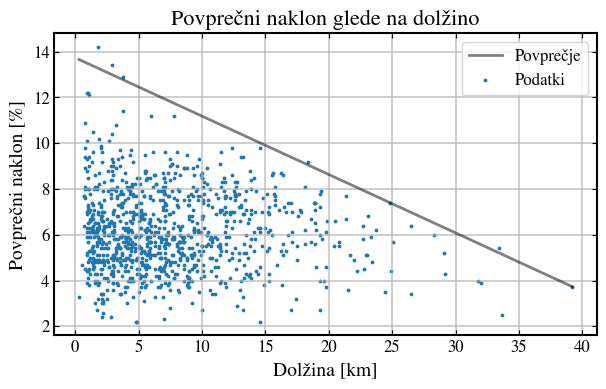

In [ ]:
length_frame = data_frame[data_frame["Length"] != 0].drop_duplicates(subset=["Name", "Length"])

length = length_frame["Length"]
stepness =  length_frame["Steepness"]


x_fit_max = np.linspace(0, 40, 8)

categories = pd.cut(length_frame['Length'], bins=x_fit_max, include_lowest=False)

max_indices = length_frame.groupby(categories)['Steepness'].idxmax()


coefficients = np.polyfit(length[max_indices], stepness[max_indices], 1)  
polynomial = np.poly1d(coefficients)


x_fit = np.linspace(min(length), max(length), 100)
y_fit = polynomial(x_fit)

plt.plot(x_fit, y_fit, marker="none", color="black", linestyle="solid", alpha=0.5, label="Najtežji vzponi")

plt.scatter(length, stepness, s=3, label="Podatki")

plt.legend()

plt.xlabel("Dolžina [km]")
plt.ylabel("Povprečni naklon [%]")
plt.title("Povprečni naklon glede na dolžino")

Opazimo, da se povprečni naklon z dolžino vzpona počasi zamnjšuje, kar je pričakovano. 

#### Težavnost vzponov ####
Vzpone lahko karakteriziramo tudi po težavnosti. Za metriko lahko vzamemo recimo [**ASO**](https://www.rouleur.cc/blogs/the-rouleur-journal/how-are-the-tour-de-france-climbs-classified) formulo $$S = L G^2, $$ kjer je $L$ dolžina vzpona in $G$ povprečni naklon. Ta formula se lahko uporablja za določitev težavnostnih točk na dirki po Franciji. Klasifikacija pa je sledeča:
- $S > 600$ - hors catégorie (ne klasificirano),
- $600 \ge S > 300$ - 1. kategorija
- $300 \ge S > 150$ - 2. kategorija
- $150 \ge S > 75$ - 3. kategorija
- $75 \ge S > 0$ - 4. kategorija.

Za primerjavo pa vzamimo formulo, ki je bila določena z regresijskim modelom na sledečem [linku](https://www.scienceofpeloton.com/p/judging-climbing-stage-difficulty) 
$$ S = G + L + S + G L, $$
kjer je $S$ nadomorska višina najvišje točke vzpona.

Sprva si poglejmo, najtežje vzpone glede na obe metriki.

In [100]:
stepness = data_frame['Steepness']
length = data_frame['Length']
vertical = data_frame['Vertical']

stepness_non_zero = stepness != 0
length_non_zero = length != 0
vertical_non_zero = vertical != 0

data_frame["AOC score"] = stepness ** 2 * length
data_frame["Regression score"] = stepness + length + vertical + stepness * length

data_frame[stepness_non_zero & length_non_zero & vertical_non_zero].sort_values("AOC score", ascending=False).drop_duplicates(subset="Name").head(10)

,Name,Length,Steepness,Vertical,Year,Race,AOC score,Regression score
993,Colle delle Finestre,18.4,9.2,2149,2025,giro-d-italia,1557.376,2345.88
515,Altu d'El Gamoniteiru,14.6,9.8,1762,2021,vuelta-a-espana,1402.184,1929.48
761,Passo dello Stelvio/Stilfserjoch,24.8,7.4,2746,2020,giro-d-italia,1358.048,2961.72
66,Col de la Loze,21.4,7.7,2302,2020,tour-de-france,1268.806,2495.88
12,Col du Portet,16.2,8.7,2206,2018,tour-de-france,1226.178,2371.84
556,Sierra Nevada,19.4,7.9,2499,2022,vuelta-a-espana,1210.754,2679.56
706,L'Angliru - Cima Alberto Fernández,12.4,9.8,1569,2025,vuelta-a-espana,1190.896,1712.72
948,Monte Grappa,18.1,8.1,1671,2024,giro-d-italia,1187.541,1843.81
394,Mont Ventoux,15.6,8.7,1831,2025,tour-de-france,1180.764,1991.02
391,Col de la Madeleine,19.3,7.8,1984,2025,tour-de-france,1174.212,2161.64


In [99]:
data_frame[stepness_non_zero & length_non_zero & vertical_non_zero].sort_values("Regression score", ascending=False).drop_duplicates(subset="Name").head(10)

,Name,Length,Steepness,Vertical,Year,Race,AOC score,Regression score
323,Cime de la Bonette,23.1,6.8,2798,2024,tour-de-france,1068.144,2984.98
761,Passo dello Stelvio/Stilfserjoch,24.8,7.4,2746,2020,giro-d-italia,1358.048,2961.72
194,Col du Galibier,17.6,6.8,2630,2022,tour-de-france,813.824,2774.08
556,Sierra Nevada,19.4,7.9,2499,2022,vuelta-a-espana,1210.754,2679.56
13,Val Thorens,33.4,5.4,2363,2019,tour-de-france,973.944,2582.16
202,Col du Granon,11.4,9.1,2403,2022,tour-de-france,944.034,2527.24
252,Col de la Loze,28.3,6.0,2300,2023,tour-de-france,1018.800,2504.10
141,Port d'Envalira,10.8,5.8,2406,2021,tour-de-france,363.312,2485.24
389,Col de la Loze - Souvenir Henri Desgrange,26.5,6.4,2275,2025,tour-de-france,1085.440,2477.50
979,Mottolino,4.6,7.7,2387,2024,giro-d-italia,272.734,2434.72


Opazimo, da sta metriki precej različni. Sploh glede na to, da vzpona z najvišjim AOC seštevkom sploh ni med najboljših 10 po regresijsekm seštevku. Očitna razlika je že to, da so vzponi, ki se končajo višje, tudi veliko burtalnejši po regresijskem modelu. To je sicer  splošno sprejeto dejstvo v kolesarskih krogih in tudi precej smiselno, ker je odstotek kisika na teh višinah manjši.
